<img src='telescope.png' style="display: block; margin-left: auto; margin-right: auto; width: 50%;">

###### Pic credit: Clearbit

## Time Series Analysis

Time Series is a sequence of well-defined data points measured at consistent time intervals over a period of time. Data collected on an ad-hoc basis or irregularly does not form a time series. Time series analysis is the use of statistical methods to analyze time series data and extract meaningful statistics and characteristics about the data.

Time series Analysis helps us understand what are the underlying forces leading to a particular trend in the time series data points and helps us in forecasting and monitoring the data points by fitting appropriate models to it.

Business managers use time series analysis on a regular basis for <b>sales forecasting</b>, budgetary analysis, inventory management and quality control.

Ex- say monthly sales of a product or daily closing value of NASDAQ

## Benefits and Applications of Time Series Analysis

Time series analysis aims to achieve various objectives and the tools and models used vary accordingly. The various types of time series analysis include –

<b>Descriptive analysis:</b>
To determine the trend or pattern in a time series using graphs or other tools. This helps us identify cyclic patterns, overall trends, turning points and outliers.


<b>Spectral analysis:</b> 
Is also referred to as frequency domain and aims to separate periodic or cyclical components in a time series. For example, identifying cyclical changes in sales of a product.


<b>Forecasting:</b> 
Used extensively in business forecasting, budgeting, etc based on historical trends

## Data Set

We are using superstores salse data for our analysis. Data can be downloaded from  <a href="https://archive.ics.uci.edu/ml/datasets/Online+Retail" target="_blank">here </a>

In [63]:
# Import libraries
import os
import re
import warnings
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
from tqdm import tqdm
from pylab import rcParams
import statsmodels.api as sm
import matplotlib.pyplot as plt


%matplotlib inline
warnings.filterwarnings("ignore")

color = sns.color_palette()

In [21]:
data = pd.read_excel('Superstore.xls')
data.shape

(9994, 21)

In [22]:
data.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
Row ID           9994 non-null int64
Order ID         9994 non-null object
Order Date       9994 non-null datetime64[ns]
Ship Date        9994 non-null datetime64[ns]
Ship Mode        9994 non-null object
Customer ID      9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal Code      9994 non-null int64
Region           9994 non-null object
Product ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(13)
memory usage: 1.6+ 

<b>Observation :</b> <br>Data set is having total 9994 rows and 21 columns. <br>There is no null value in data.

In [24]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [35]:
data.groupby('Category')['Row ID'].count()

Category
Furniture          2121
Office Supplies    6026
Technology         1847
Name: Row ID, dtype: int64

<b>Observation :</b> <br>Data set contains three categories Furniture, Office Supplies and Technology. <br>We will see them one by one.

## 1. Let's consider Furniture 

In [36]:
furniture = data[data['Category']=='Furniture']
furniture.shape

(2121, 21)

### 1.1 Let's check order span

In [40]:
print('Oldest order date : ',furniture['Order Date'].min())
print('Latest order date : ',furniture['Order Date'].max())

Oldest order date :  2014-01-06 00:00:00
Latest order date :  2017-12-30 00:00:00


<b>Observation :</b> <br>We have nearly 4 years of sales data for furniture.

### 1.2 Data preprocessing

Remove un-necessory columns

In [42]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')

In [44]:
furniture.head(5)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940


In [47]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture.shape

(889, 2)

In [48]:
furniture.head(5)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


### 1.3 Indexing with time series column

In [50]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

<b>Observation :</b> <br>Here date is not uniform therefore we will use the averages daily sales value for that month instead.<br> We are using the start of each month as the timestamp.

In [51]:
furniture_m = furniture['Sales'].resample('MS').mean()
furniture_m.shape

(48,)

2016 and 2017 sales data -

In [58]:
furniture_m['2016':]

Order Date
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

### 1.4 Visualizing furniture sales data

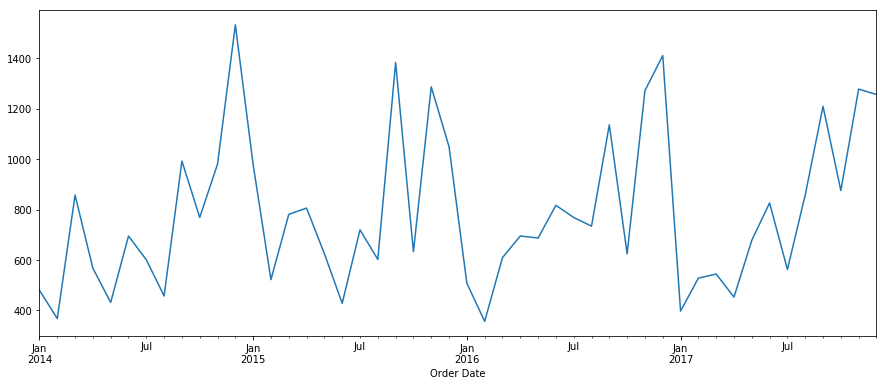

In [59]:
furniture_m.plot(figsize=(15, 6))
plt.show()

<b>Observation :</b> <br>We can clearly see some seasonality pattern here.<br>Sales is always low at year start. <br>Salse goes higher somewhere at the end of year. 

Let's decompose time series into seperate trend, seasonal and residual components.

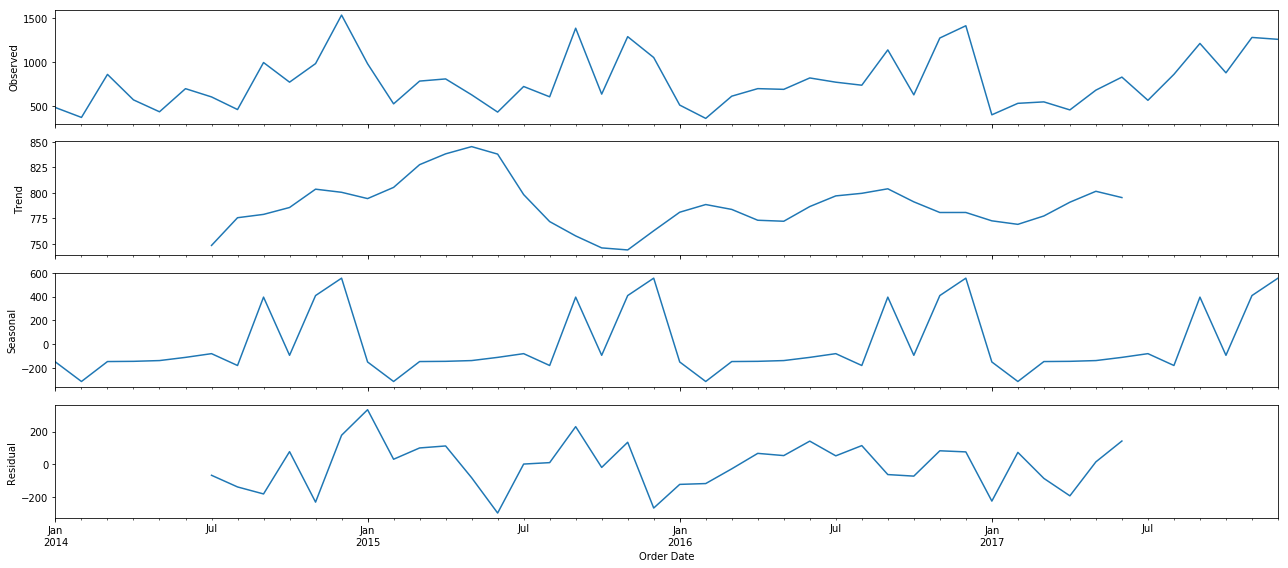

In [64]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(furniture_m, model='additive')
fig = decomposition.plot()
plt.show()

<b>Observation :</b> <br>It shows that the sales of furniture is unstable. <br>Seasonality is there.